# **EDA**

Data Minions

In [1]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")

In [ ]:
from google.cloud import bigquery
import pandas as pd

project_id = "big-data-crypto-sentiment-test"
client = bigquery.Client(project=project_id)

In [ ]:
query_fix_prices = """
CREATE OR REPLACE TABLE `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed` AS
SELECT
  symbol,
  price,
  TIMESTAMP_MILLIS(CAST(timestamp AS INT64)) AS timestamp
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices`;
"""

client.query(query_fix_prices).result()


In [ ]:
query_check = """
SELECT
  MIN(timestamp) AS min_timestamp,
  MAX(timestamp) AS max_timestamp
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed`;
"""

client.query(query_check).to_dataframe()

,min_timestamp,max_timestamp
0,2025-11-23 21:41:44.894000+00:00,2025-12-22 11:32:24.237000+00:00


In [ ]:
query_tweets = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_tweets`
"""

df_tweets = client.query(query_tweets).to_dataframe()

In [ ]:
df_tweets.head()

,id,text,author_id,crypto_key,created_at_raw,created_at_iso,timestamp_ms,timestamp_sec
0,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:48:37.140544+00:00,1763934517140,1758597013
1,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:41:52.641150+00:00,1763934112641,1758597013
2,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:42:18.218113+00:00,1763934138218,1758597013
3,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:48:06.962910+00:00,1763934486962,1758597013
4,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:43:57.325803+00:00,1763934237325,1758597013


In [ ]:
query_prices = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed`
"""

df_prices = client.query(query_prices).to_dataframe()

In [ ]:
df_prices.head()

,symbol,price,timestamp
0,ETH,2645.103578,2025-11-23 21:44:16.411000+00:00
1,ETH,2868.885564,2025-11-23 21:42:45.556000+00:00
2,ETH,2828.626987,2025-12-22 10:11:23.519000+00:00
3,ETH,2629.558941,2025-12-22 10:58:35.036000+00:00
4,ETH,2751.157704,2025-12-22 10:02:48.785000+00:00


In [ ]:
query_joined = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.crypto_prices_with_tweets`
"""

df_joined = client.query(query_joined).to_dataframe()

In [ ]:
df_joined.head()

,event_timestamp,symbol,tweet_volume,avg_price,last_price,tweet_texts
0,2025-11-23 16:42:30+00:00,ETH,18,2763.853200,2744.745773,[So I finally sat down and actually wired my w...
1,2025-11-23 16:44:30+00:00,FTM,2,0.000000,0.000000,[Own your success story.\n\nUnlock 300% profit...
2,2025-12-22 09:51:00+00:00,FTM,1,0.107071,0.104375,[Chase the vision. Money follows.\n\nProfit fa...
3,2025-12-22 09:51:00+00:00,ETH,2,2693.075456,2713.852051,"[Entdecke die Herbst Must-haves, $BARD | Highe..."
4,2025-12-22 10:21:00+00:00,FTM,18,0.109043,0.105338,"[$PAXG $FTM Guys, Don't miss the next move ..."


# Dataset Overview

## Tweets

In [ ]:
df_tweets.shape

(8499, 8)

In [ ]:
df_tweets.columns

Index(['id', 'text', 'author_id', 'crypto_key', 'created_at_raw',
       'created_at_iso', 'timestamp_ms', 'timestamp_sec'],
      dtype='object')

In [ ]:
cutoff_time = pd.Timestamp("2025-12-22 10:00:00", tz="UTC") # od 12:00 22.12 zmienić,wczesniej syntetyczne
df_tweets = df_tweets[df_tweets["created_at_iso"] >= cutoff_time].copy()

In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162 entries, 21 to 8498
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              7162 non-null   object             
 1   text            7162 non-null   object             
 2   author_id       7162 non-null   object             
 3   crypto_key      7162 non-null   object             
 4   created_at_raw  7162 non-null   object             
 5   created_at_iso  7162 non-null   datetime64[us, UTC]
 6   timestamp_ms    7162 non-null   Int64              
 7   timestamp_sec   7162 non-null   Int64              
dtypes: Int64(2), datetime64[us, UTC](1), object(5)
memory usage: 517.6+ KB


In [ ]:
df_tweets["created_at_iso"] = pd.to_datetime(df_tweets["created_at_iso"])

In [ ]:
df_tweets["created_at_iso"].min(), df_tweets["created_at_iso"].max()

(Timestamp('2025-12-22 10:00:00.342614+0000', tz='UTC'),
 Timestamp('2025-12-22 11:32:50.330337+0000', tz='UTC'))

/tmp/ipython-input-457310650.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample("T")


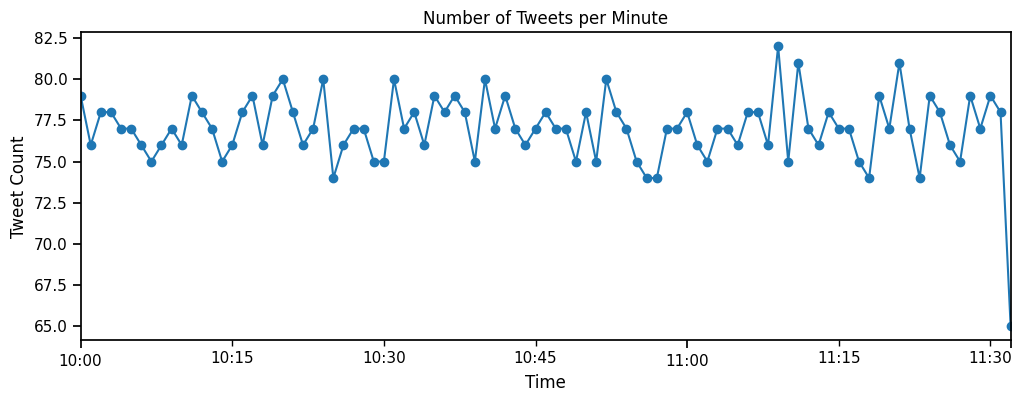

In [ ]:
tweets_per_minute = (
    df_tweets
    .set_index("created_at_iso")
    .resample("T")
    .size()
)

tweets_per_minute.plot(figsize=(12, 4), marker="o")
plt.title("Number of Tweets per Minute")
plt.xlabel("Time")
plt.ylabel("Tweet Count")
plt.show()

/tmp/ipython-input-516016634.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("10S")


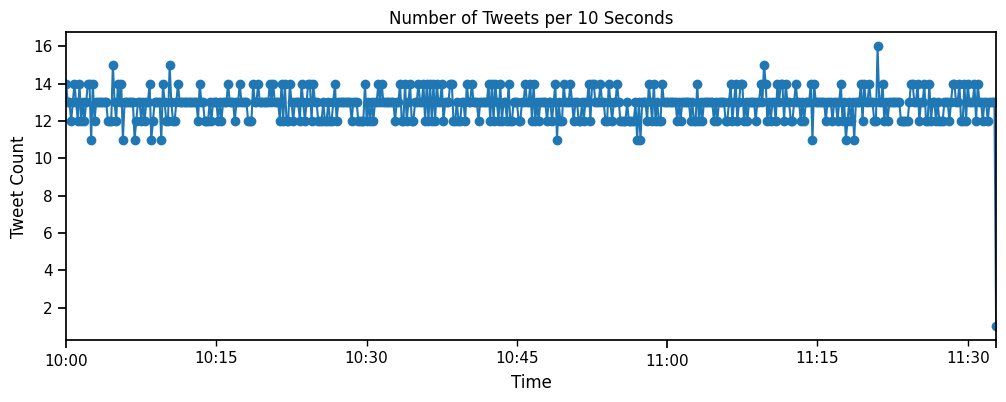

In [ ]:
tweets_per_10s = (
    df_tweets
    .set_index("created_at_iso")
    .resample("10S")
    .size()
)

tweets_per_10s.plot(figsize=(12, 4), marker="o")
plt.title("Number of Tweets per 10 Seconds")
plt.xlabel("Time")
plt.ylabel("Tweet Count")
plt.show()

In [ ]:
tweets_per_crypto = (
    df_tweets["crypto_key"]
    .value_counts()
    .reset_index()
)

tweets_per_crypto.columns = ["cryptocurrency", "tweet_count"]
tweets_per_crypto

,cryptocurrency,tweet_count
0,ETH,1857
1,FTM,1821
2,SOL,1769
3,SHIB,1715


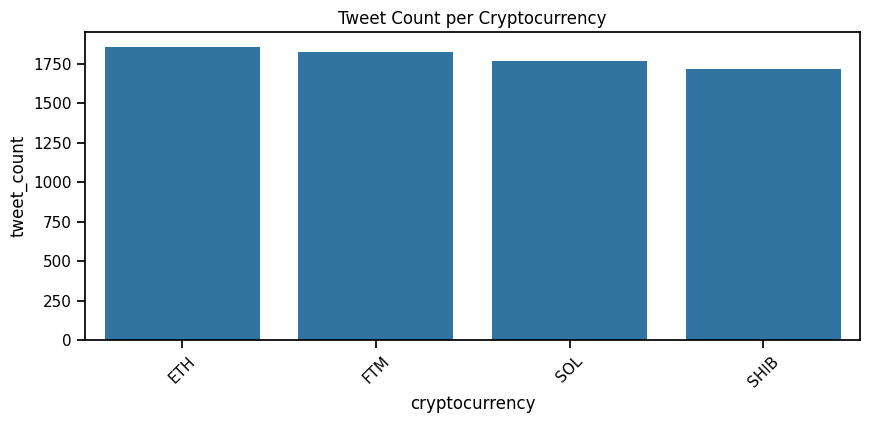

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(
    data=tweets_per_crypto,
    x="cryptocurrency",
    y="tweet_count"
)
plt.title("Tweet Count per Cryptocurrency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_tweets["text_length"] = df_tweets["text"].str.len()

In [ ]:
df_tweets["text_length"].describe()

,text_length
count,7162.000000
mean,182.345993
std,143.910447
min,30.000000
25%,72.000000
50%,171.000000
75%,233.000000
max,701.000000


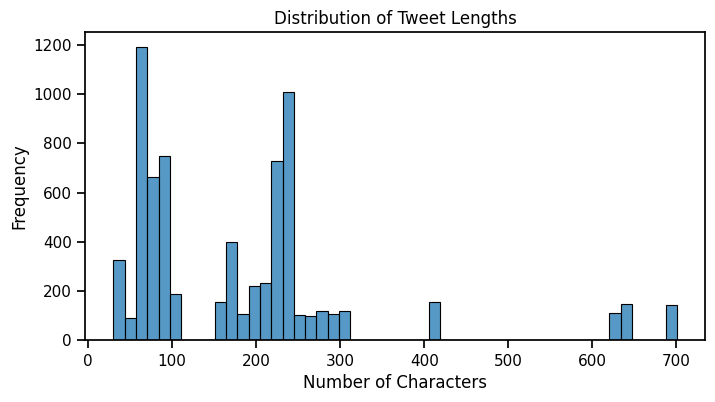

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tweets["text_length"], bins=50)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [ ]:
(df_tweets["text_length"] < 10).mean()

np.float64(0.0)

In [ ]:
# most active authors
top_authors = (
    df_tweets["author_id"]
    .value_counts()
    .head(10)
)

top_authors

,count
author_id,
271794902,1364
1829520318425382912,457
1901534065271992320,342
3823848513,325
1292254233593622529,319
1471268839388323849,223
344569124,175
1942092282989277184,157
1379643802713870336,154


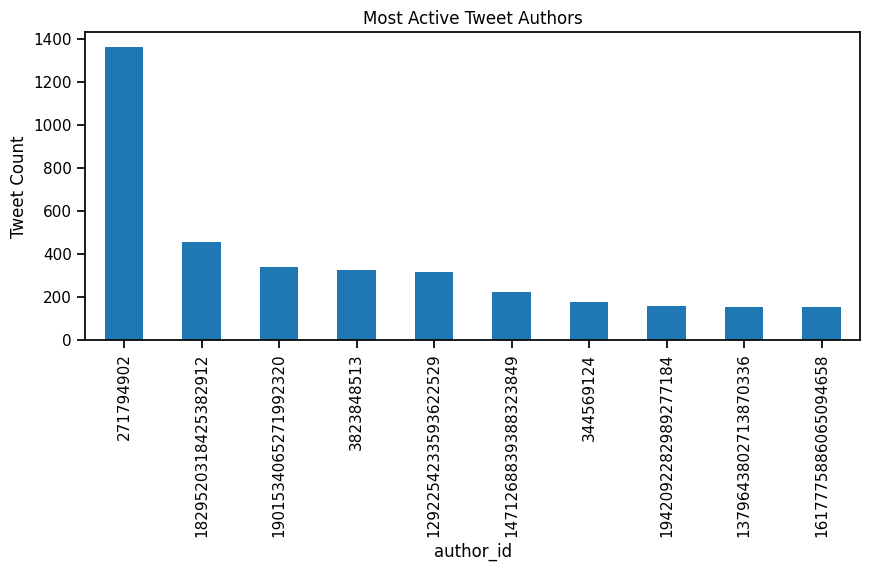

In [ ]:
top_authors.plot(kind="bar", figsize=(10, 4))
plt.title("Most Active Tweet Authors")
plt.ylabel("Tweet Count")
plt.show()

## Cryptocurrency

In [ ]:
df_prices.shape

(1744, 3)

In [ ]:
df_prices.columns

Index(['symbol', 'price', 'timestamp'], dtype='object')

In [ ]:
df_prices = df_prices[df_prices["timestamp"] >= cutoff_time].copy()

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 2 to 1743
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   symbol     1468 non-null   object             
 1   price      1468 non-null   float64            
 2   timestamp  1468 non-null   datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), object(1)
memory usage: 45.9+ KB


In [ ]:
df_prices["timestamp"].head(10)

,timestamp
2,2025-12-22 10:11:23.519000+00:00
3,2025-12-22 10:58:35.036000+00:00
4,2025-12-22 10:02:48.785000+00:00
5,2025-12-22 10:13:39.789000+00:00
6,2025-12-22 10:22:29.699000+00:00
7,2025-12-22 10:24:46.011000+00:00
8,2025-12-22 10:35:52.359000+00:00
9,2025-12-22 10:38:08.561000+00:00
10,2025-12-22 11:16:15.066000+00:00
11,2025-12-22 11:31:38.826000+00:00


In [ ]:
df_prices["timestamp"].describe()

,timestamp
count,1468
mean,2025-12-22 10:46:13.132855+00:00
min,2025-12-22 10:00:02.157000+00:00
25%,2025-12-22 10:23:00.015000+00:00
50%,2025-12-22 10:46:13.146000+00:00
75%,2025-12-22 11:09:26.232000+00:00
max,2025-12-22 11:32:24.237000+00:00


In [ ]:
df_prices.isna().sum()

,0
symbol,0
price,0
timestamp,0


In [ ]:
df_prices["timestamp"] = pd.to_datetime(
    df_prices["timestamp"],
    unit="s"
)

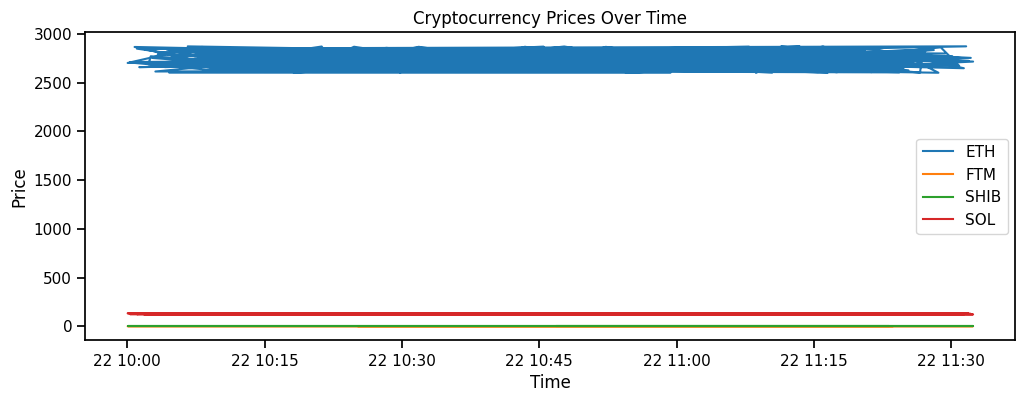

In [ ]:
plt.figure(figsize=(12, 4))

for symbol in df_prices["symbol"].unique():
    subset = df_prices[df_prices["symbol"] == symbol]
    plt.plot(
        subset["timestamp"],
        subset["price"],
        label=symbol
    )

plt.legend()
plt.title("Cryptocurrency Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
# price changes
df_prices = df_prices.sort_values(
    ["symbol", "timestamp"]
)

df_prices["price_change"] = (
    df_prices
    .groupby("symbol")["price"]
    .diff()
)
df_prices.groupby("symbol")["price_change"].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
ETH,366.0,3.855380e-02,1.097357e+02,-2.555036e+02,-7.307782e+01,-1.698117e+00,7.217659e+01,2.606843e+02
FTM,366.0,-3.204542e-06,4.407595e-03,-9.337439e-03,-3.358317e-03,2.738512e-05,3.126937e-03,1.047009e-02
SHIB,366.0,-5.850525e-10,3.323406e-07,-7.345345e-07,-2.397216e-07,-1.293701e-08,2.541401e-07,7.494140e-07
SOL,366.0,-3.013986e-02,5.453190e+00,-1.198373e+01,-4.063287e+00,6.908427e-02,3.725476e+00,1.234845e+01


## Relationship Between Tweets and Prices

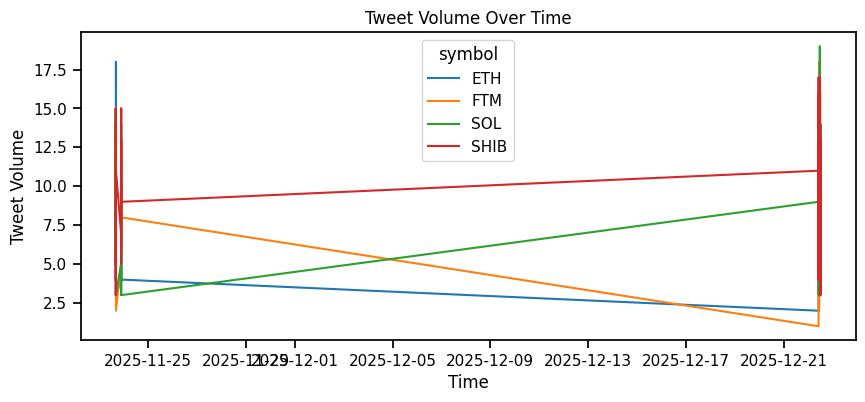

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=df_joined,
    x="event_timestamp",
    y="tweet_volume",
    hue="symbol"
)
plt.title("Tweet Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Tweet Volume")
plt.show()


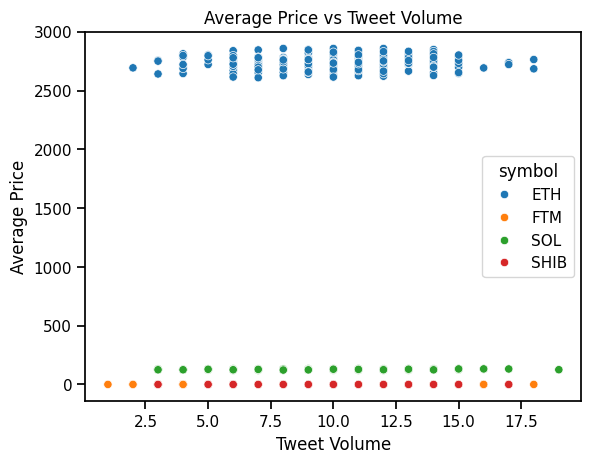

In [ ]:
sns.scatterplot(
    data=df_joined,
    x="tweet_volume",
    y="avg_price",
    hue="symbol"
)
plt.title("Average Price vs Tweet Volume")
plt.xlabel("Tweet Volume")
plt.ylabel("Average Price")
plt.show()

In [ ]:
df_joined[["tweet_volume", "avg_price"]].corr()

,tweet_volume,avg_price
tweet_volume,1.000000,0.041702
avg_price,0.041702,1.000000


## Price volatility vs tweet volume

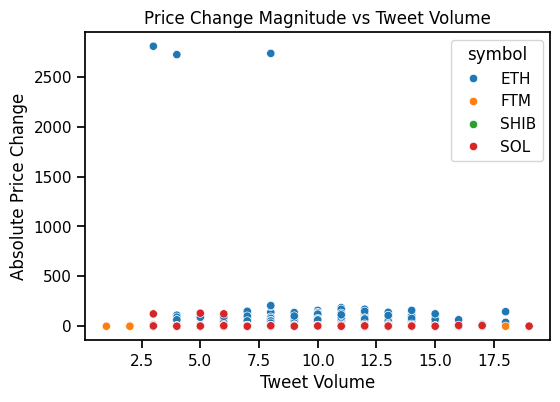

In [ ]:
df_joined = df_joined.sort_values(["symbol", "event_timestamp"])

df_joined["price_change"] = (
    df_joined
    .groupby("symbol")["avg_price"]
    .diff()
    .abs()
)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_joined,
    x="tweet_volume",
    y="price_change",
    hue="symbol"
)
plt.title("Price Change Magnitude vs Tweet Volume")
plt.xlabel("Tweet Volume")
plt.ylabel("Absolute Price Change")
plt.show()


## Distribution of tweet volume per symbol

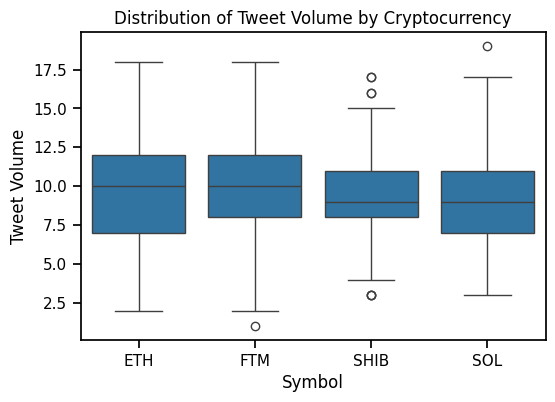

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_joined,
    x="symbol",
    y="tweet_volume"
)
plt.title("Distribution of Tweet Volume by Cryptocurrency")
plt.xlabel("Symbol")
plt.ylabel("Tweet Volume")
plt.show()

## Price dispersion across symbols

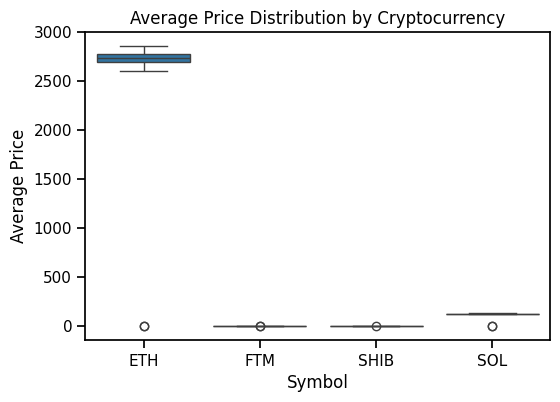

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_joined,
    x="symbol",
    y="avg_price"
)
plt.title("Average Price Distribution by Cryptocurrency")
plt.xlabel("Symbol")
plt.ylabel("Average Price")
plt.show()


# normalised price changes

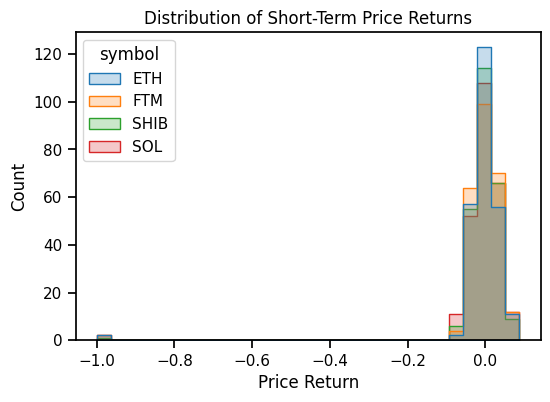

In [ ]:
df_joined["price_return"] = (
    df_joined
    .groupby("symbol")["avg_price"]
    .pct_change()
)

plt.figure(figsize=(6, 4))
sns.histplot(
    data=df_joined,
    x="price_return",
    hue="symbol",
    bins=30,
    element="step"
)
plt.title("Distribution of Short-Term Price Returns")
plt.xlabel("Price Return")
plt.show()


## lagged tweet volume vs price change

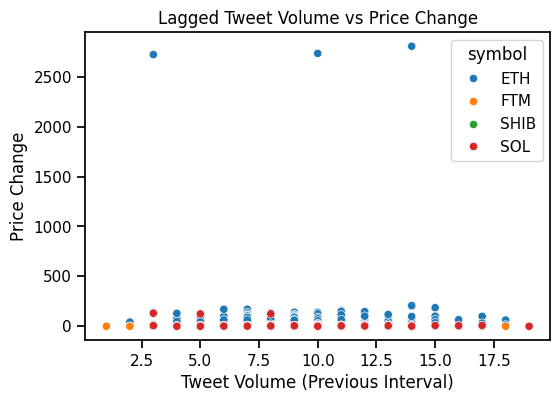

In [ ]:
df_joined["tweet_volume_lag1"] = (
    df_joined
    .groupby("symbol")["tweet_volume"]
    .shift(1)
)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_joined,
    x="tweet_volume_lag1",
    y="price_change",
    hue="symbol"
)
plt.title("Lagged Tweet Volume vs Price Change")
plt.xlabel("Tweet Volume (Previous Interval)")
plt.ylabel("Price Change")
plt.show()


## correlation by symbol

In [ ]:
for symbol in df_joined["symbol"].unique():
    corr = df_joined[df_joined["symbol"] == symbol][
        ["tweet_volume", "avg_price"]
    ].corr().iloc[0,1]
    print(symbol, corr)

ETH 0.1310487877023762
FTM 0.11381548563060913
SHIB 0.1311288692564061
SOL 0.18647471094207976


## correlation with prices changes (not level)

In [ ]:
for symbol in df_joined["symbol"].unique():
    subset = df_joined[df_joined["symbol"] == symbol]
    corr = subset[["tweet_volume", "price_change"]].corr().iloc[0,1]
    print(symbol, corr)

ETH -0.14949095090072076
FTM -0.17797518604384596
SHIB -0.12348947791478837
SOL -0.17139155821259672
